# Visualizing Illinois COVID-19 cases

## Import Libraries

In [0]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from google.colab import files # for downloading date from the notebook

# Magic functions for printing high quality plots in the notebook
# They are not Python codes
%matplotlib inline 
%config InlineBackend.figure_format = "retina"

## Data Preprocessing


In [0]:
# Read in COVID-19 by counties
counties_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/e8945b9d8bfd524a8083f6935e6556162a90b10f/us-counties.csv'
county_df = pd.read_csv(counties_url)
county_df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [0]:
# We will focus on on Illinois 
illinois_df = county_df[county_df['state'] == 'Illinois']
illinois_df.head(5)

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
11,2020-01-26,Cook,Illinois,17031.0,1,0
16,2020-01-27,Cook,Illinois,17031.0,1,0
21,2020-01-28,Cook,Illinois,17031.0,1,0


##Exercise 1

**Plot the cases and deaths in Cook county over time**

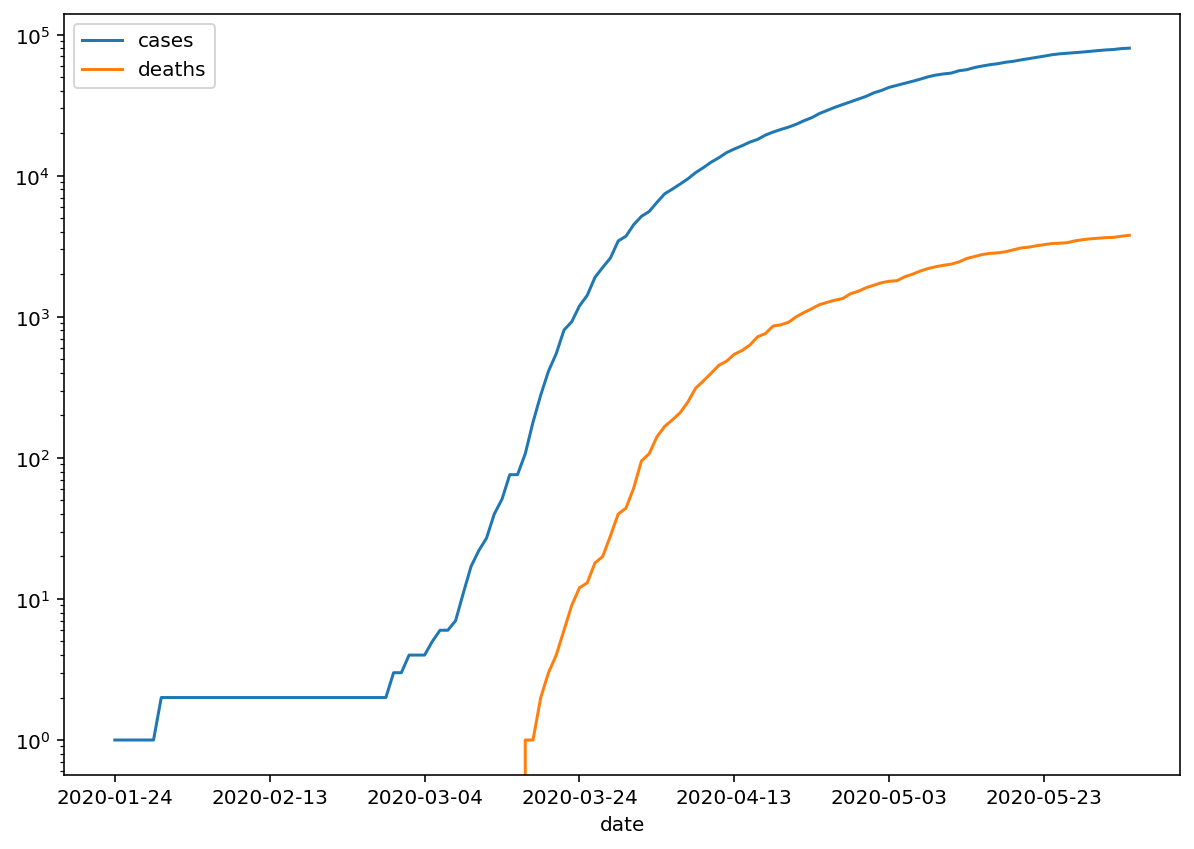

In [0]:
# Your codes go here ... 
#cook_df = ??? # dataframe with only Cook county data

# Answers
# Let first see how the cases and deaths evolve over time in Cook county
cook_df = illinois_df[illinois_df['county'] == 'Cook']
ax = cook_df.plot(x='date', y='cases', figsize=(10,7))
cook_df.plot(x='date', y='deaths', ax=ax)
ax.set_yscale('log')
plt.show()

## Exercise 2

**Plot the cases and deaths in Cook county and Illinois over time in a single plot**

In [0]:
# To find all cases and deaths in Illinois, we have to sum over all counties 
# at the given date
allcases_df = illinois_df.groupby('date')['cases'].sum()
alldeaths_df =  illinois_df.groupby('date')['deaths'].sum()

print(allcases_df.head(5))
print(alldeaths_df.head(5))

date
2020-01-24    1
2020-01-25    1
2020-01-26    1
2020-01-27    1
2020-01-28    1
Name: cases, dtype: int64
date
2020-01-24    0
2020-01-25    0
2020-01-26    0
2020-01-27    0
2020-01-28    0
Name: deaths, dtype: int64


          date county     state     fips  cases  deaths
3   2020-01-24   Cook  Illinois  17031.0      1       0
6   2020-01-25   Cook  Illinois  17031.0      1       0
11  2020-01-26   Cook  Illinois  17031.0      1       0
16  2020-01-27   Cook  Illinois  17031.0      1       0
21  2020-01-28   Cook  Illinois  17031.0      1       0
26  2020-01-29   Cook  Illinois  17031.0      1       0
31  2020-01-30   Cook  Illinois  17031.0      2       0
37  2020-01-31   Cook  Illinois  17031.0      2       0
43  2020-02-01   Cook  Illinois  17031.0      2       0
51  2020-02-02   Cook  Illinois  17031.0      2       0


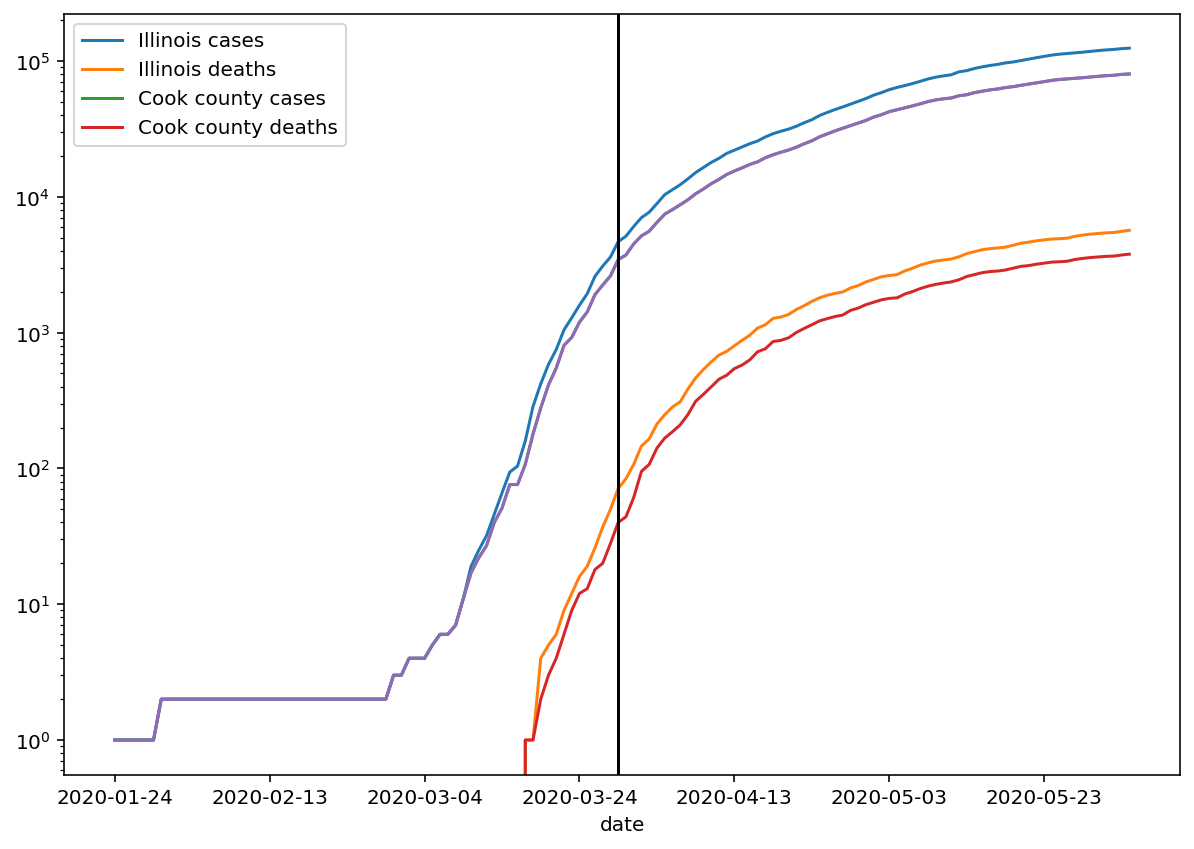

In [0]:
# Your code go here...

# Answer
# Now plot them 
ax = allcases_df.plot(x='date', y='cases', figsize=(10,7), label='Illinois cases')

alldeaths_df.plot(x='date', y='deaths', label='Illinois deaths', ax=ax)

# Also plot the cook county cases/deaths

print(cook_df.head(10))
cook_df.plot(x='date', y='cases', ax=ax, label='Cook county cases')
cook_df.plot(x='date', y='deaths', ax=ax, label='Cook county deaths')

ax.plot(cook_df['date'],cook_df['cases'])
ax.set_yscale('log')
ax.legend() # show the labels

ax.axvline('2020-03-29', color='k')

plt.show()

## Exercise 3

**Create two plots that compare the total cases and deaths from counties in Illinois on the lastest day in the dataset**


In [0]:
# Find the latest date in the dataframe
illinois_df['date'] = pd.to_datetime(illinois_df['date']) # make sure the column is of datetime type
latest_date = illinois_df['date'].max() 
print('latest date is: ', latest_date)

latest date is:  2020-06-03 00:00:00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


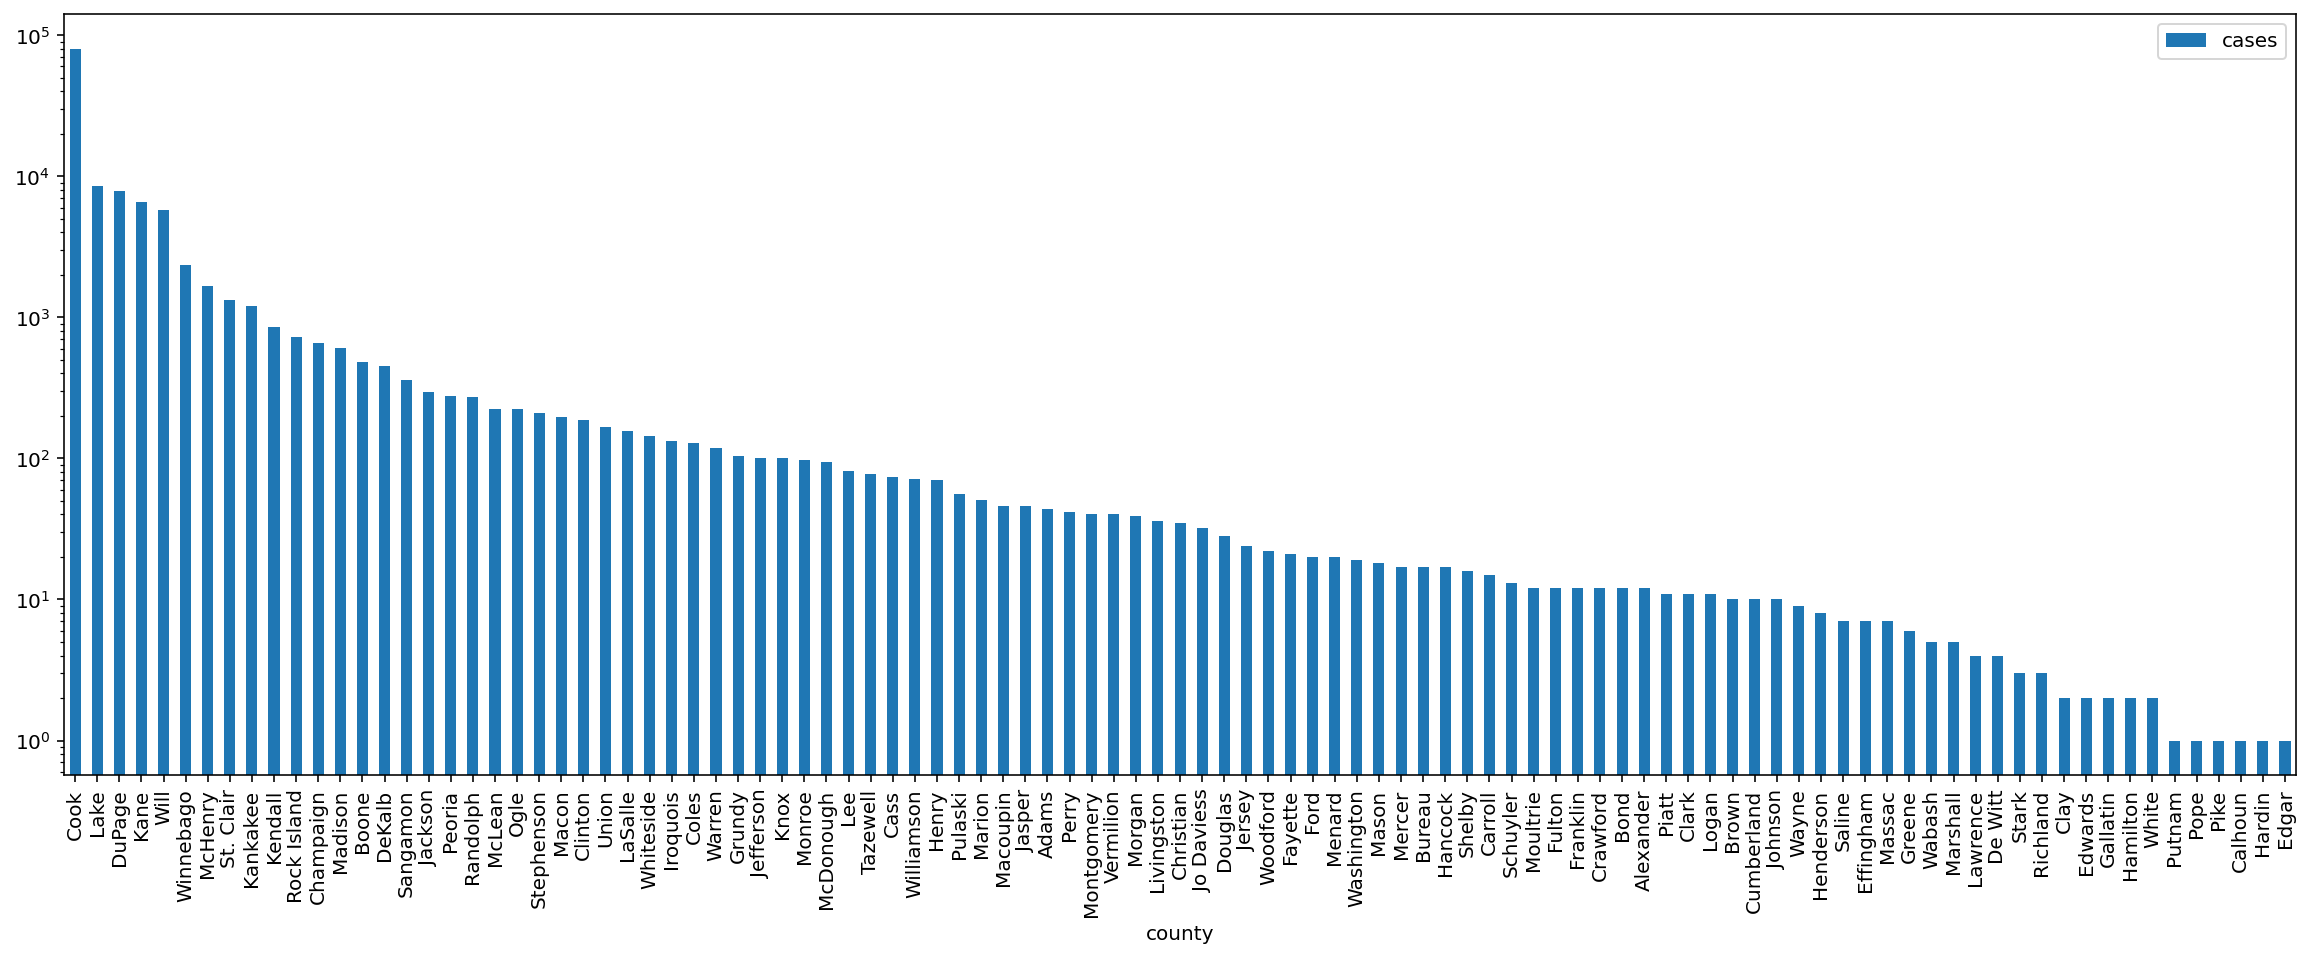

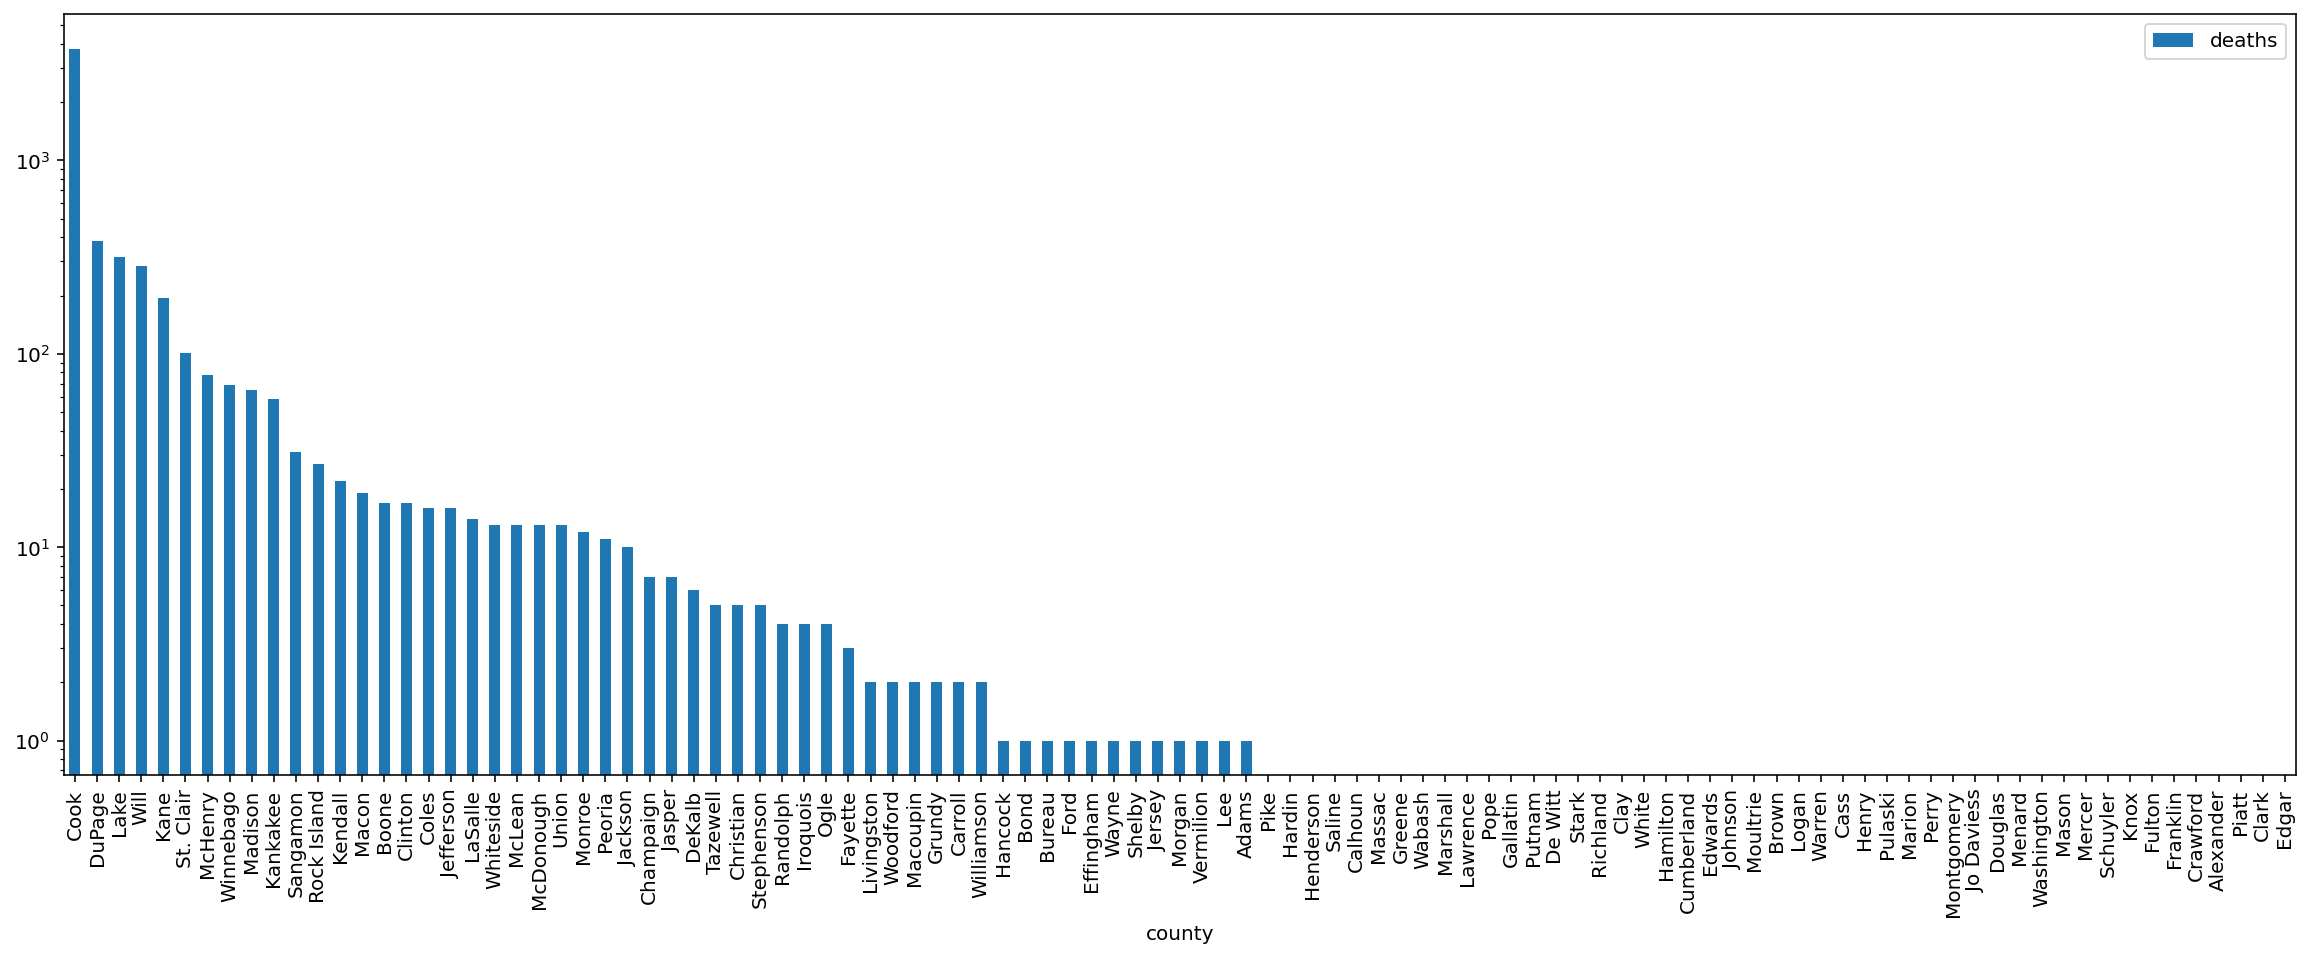

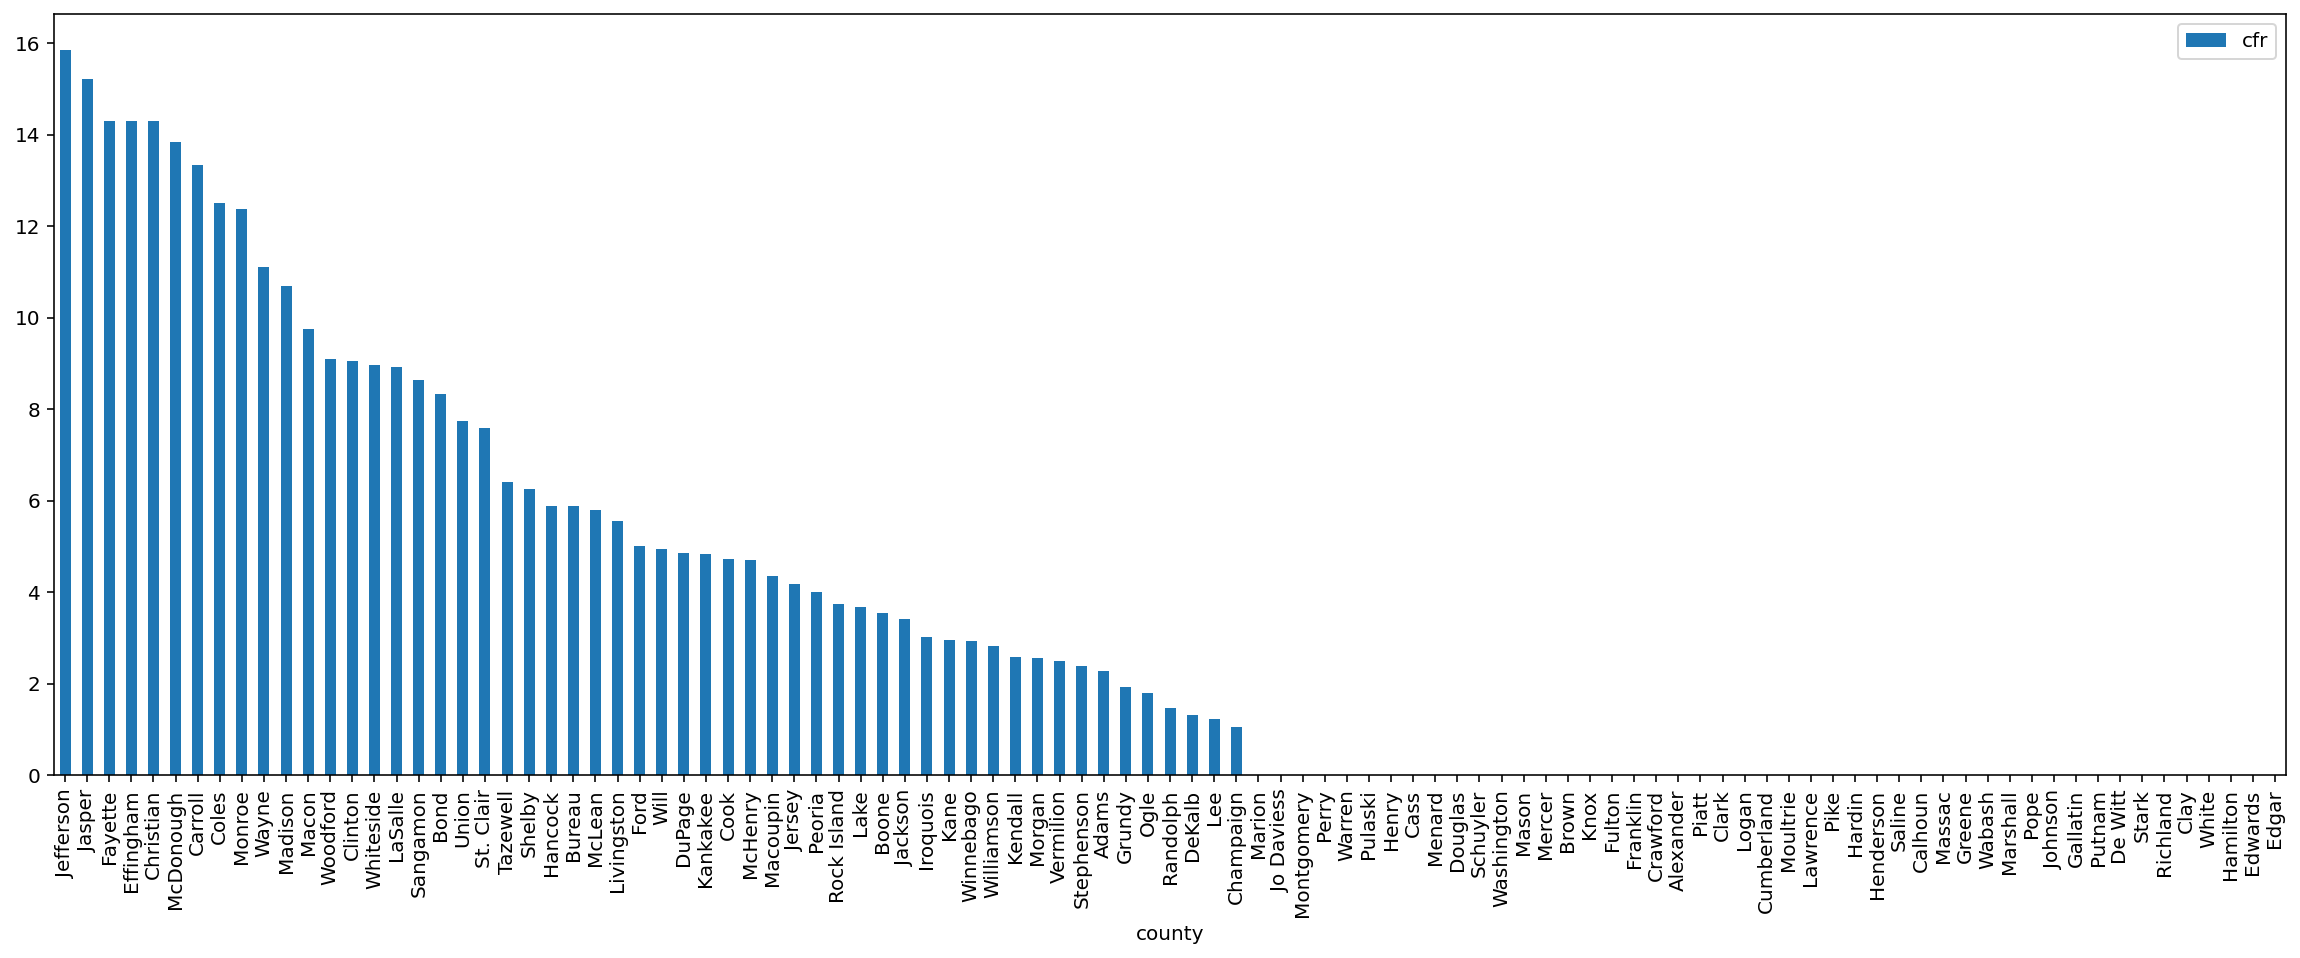

In [0]:
# Your codes go here...


# Answer 
latest_df = illinois_df[illinois_df['date'] == latest_date]

# Cases
latest_df = latest_df.sort_values(by='cases', ascending=False) 
ax = latest_df.plot(x='county', y='cases', kind='bar', figsize=(20,7))
ax.set_yscale('log')

# Deaths
latest_df = latest_df.sort_values(by='deaths', ascending=False)
ax2 = latest_df.plot(x='county', y='deaths', kind='bar', figsize=(20,7))
ax2.set_yscale('log')

# Case fatality rate
latest_df['cfr'] = latest_df['deaths']*100/latest_df['cases']
latest_df = latest_df.sort_values(by='cfr', ascending=False)
ax3 = latest_df.plot(x='county', y='cfr', kind='bar', figsize=(20,7))

plt.show()

## Illinois population

In [0]:
# We have to again find the population of each Illinois county 

pop_url = "https://raw.githubusercontent.com/ylin910095/data_visualization_2020/master/csv/us_population_counties/population.csv"
# We need special encoding because the file was presumably created in Windows
pop_df = pd.read_csv(pop_url, encoding="ISO-8859-1") 
pop_df.head(5)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,BIRTHS2019,DEATHS2010,...,RDEATH2016,RDEATH2017,RDEATH2018,RDEATH2019,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RNATURALINC2019,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RINTERNATIONALMIG2019,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5312,13632,16519,14493,11718,10548,11178,10961,13195,15504,14226,59690,59067,57929,58903,59647,59389,58961,58271,57313,11075,...,10.644438,10.925229,10.994485,11.005972,2.265531,2.225976,1.467602,1.900561,1.603236,1.580712,1.184225,0.943643,0.701470,0.973446,1.210028,1.046273,0.761796,0.944900,1.189188,0.618401,0.692264,0.566242,-0.395013,-0.023714,0.476276,-0.198307,-0.318543,-0.444016,0.471965,1.081522,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869,176,454,-273,-227,166,-29,379,147,143,336,150,638,615,571,640,651,666,676,631,624,157,...,9.935790,10.358573,9.339812,9.712572,2.254545,0.998357,-0.200582,1.222405,1.220879,2.161534,1.862012,2.037449,1.490099,0.072727,-0.254127,0.218816,0.127714,0.236887,-0.054492,-0.216933,-0.126214,-0.287248,5.945455,-5.971992,-4.121042,1.842729,-1.949762,4.831664,1.066590,0.667129,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234,847,3446,3587,4740,4298,3756,4662,4920,5334,5379,516,2189,2093,2160,2212,2257,2300,2300,2310,2304,533,...,9.850441,9.992336,10.744094,10.546624,1.947683,1.104318,1.350544,1.141935,0.790805,1.354314,0.956865,-0.009294,-0.099753,0.957611,1.268904,1.059658,0.573505,0.651544,0.876894,0.409405,0.450769,0.362739,15.684259,16.219674,21.691816,19.610829,17.074420,20.402397,21.988851,24.276447,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686,-128,14,-172,-232,-182,-472,-477,-649,-285,-186,71,331,300,282,264,271,276,280,263,256,131,...,10.750830,11.577026,13.152372,12.591307,0.292676,0.513667,-0.480538,-1.638978,-2.300238,-0.153583,-0.588662,-2.638470,-2.259978,-0.182922,-0.440286,-0.369645,0.148998,0.490215,0.652729,0.470930,0.479722,0.524638,0.475598,-6.457531,-7.762540,-5.289429,-16.214789,-18.890745,-25.469458,-9.234644,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,22745,22667,22521,22553,22566,22586,22550,22367,22394,-45,-125,-78,-146,32,13,20,-36,-183,27,44,264,246,258,253,251,276,291,232,240,32,...,10.675053,11.166253,11.710488,11.259802,-0.526143,0.440412,-0.752412,0.266229,-0.620581,1.550319,1.728111,-1.380324,-0.536181,0.438452,0.836783,0.885191,0.621201,0.576254,0.620128,0.443105,0.445266,0.446818,-5.436808,-4.624328,-6.683190,0.709944,0.753563,-1.32884

 We only need three columns here: 

*   `STATE`: State FIPS code (2-digit)
*   `COUNTY`: County FIPS code (3-digit)
*   `POPESTIMATE2019`: 7/1/2019 resident total population estimate

See https://github.com/ylin910095/data_visualization_2020/blob/master/csv/us_population_counties/README.pdf for a detailed description of all the columns.

The 5-digit FIPS code we want is equal to `STATE` + `COUNTY` (why don't we just use the county names as identifiers?)

In [0]:
# Add a new population column to our COVID-19 dataframe

# Find the FIPS code from STATE and COUNTY columns
all_fips = []
for state_fip, county_fip in zip(pop_df['STATE'], pop_df['COUNTY']):
    a = str(int(state_fip)).zfill(2) # make sure they are 3-digit
    b = str(int(county_fip)).zfill(3) # make sure they are 2-digit
    all_fips.append(int(a+b)) # 5-digit fips

pop_df['fips'] = all_fips # add a new column to the datafram
# Only retain two columns we want
reduced_df = pop_df[['fips', 'POPESTIMATE2019']] 
reduced_df.head(5)

,fips,POPESTIMATE2019
0,1000,4903185
1,1001,55869
2,1003,223234
3,1005,24686
4,1007,22394


In [0]:
# Merge the dataframes together
latest_df['fips'] = latest_df['fips'].astype(int) 
merge_df = pd.merge(latest_df, reduced_df, on='fips')
merge_df.head(5)

,date,county,state,fips,cases,deaths,cfr,POPESTIMATE2019
0,2020-06-03,Jefferson,Illinois,17081,101,16,15.841584,37684
1,2020-06-03,Jasper,Illinois,17079,46,7,15.217391,9610
2,2020-06-03,Fayette,Illinois,17051,21,3,14.285714,21336
3,2020-06-03,Effingham,Illinois,17049,7,1,14.285714,34008
4,2020-06-03,Christian,Illinois,17021,35,5,14.285714,32304


## Exercise 4


**Create two plots that compare the total cases and deaths *per capita* from counties in Illinois on the lastest day in the dataset**

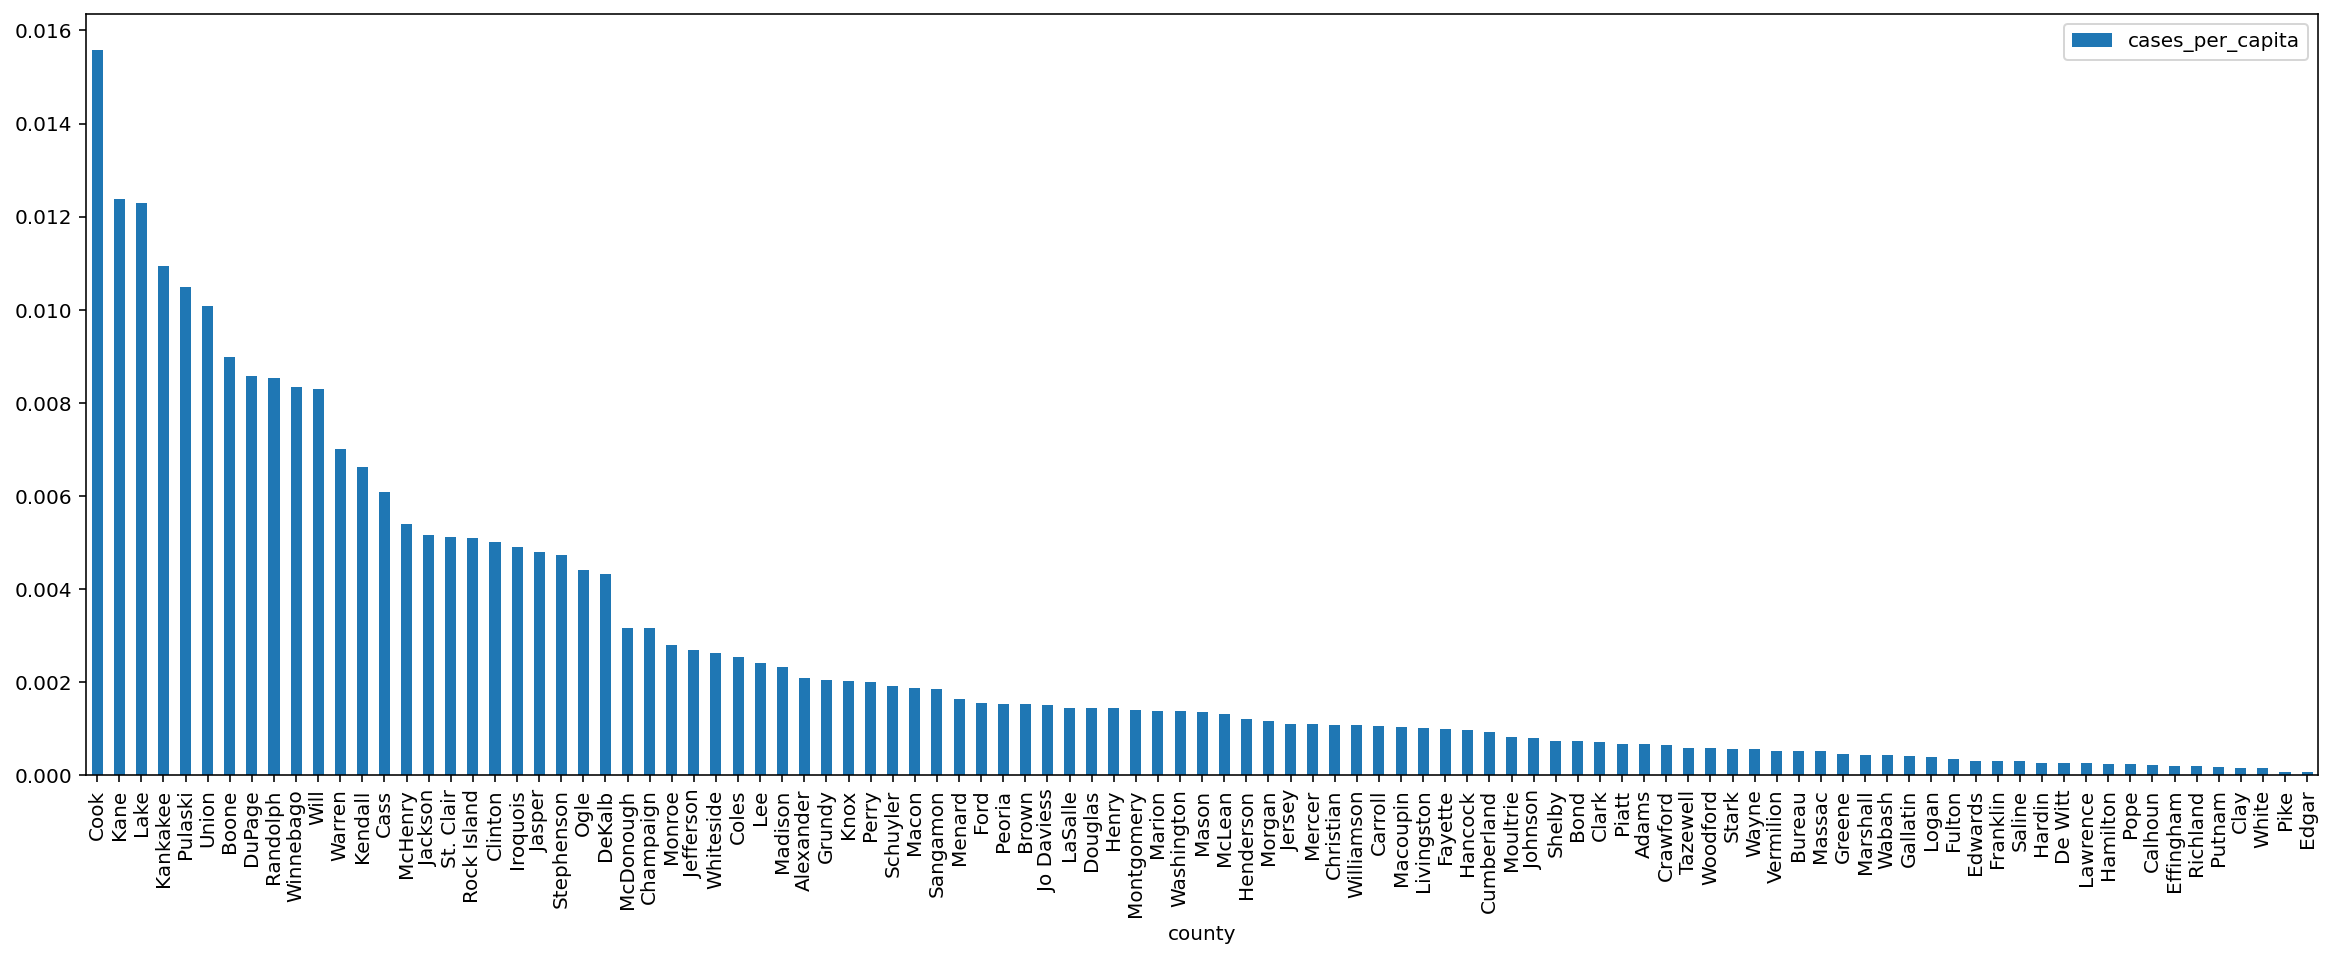

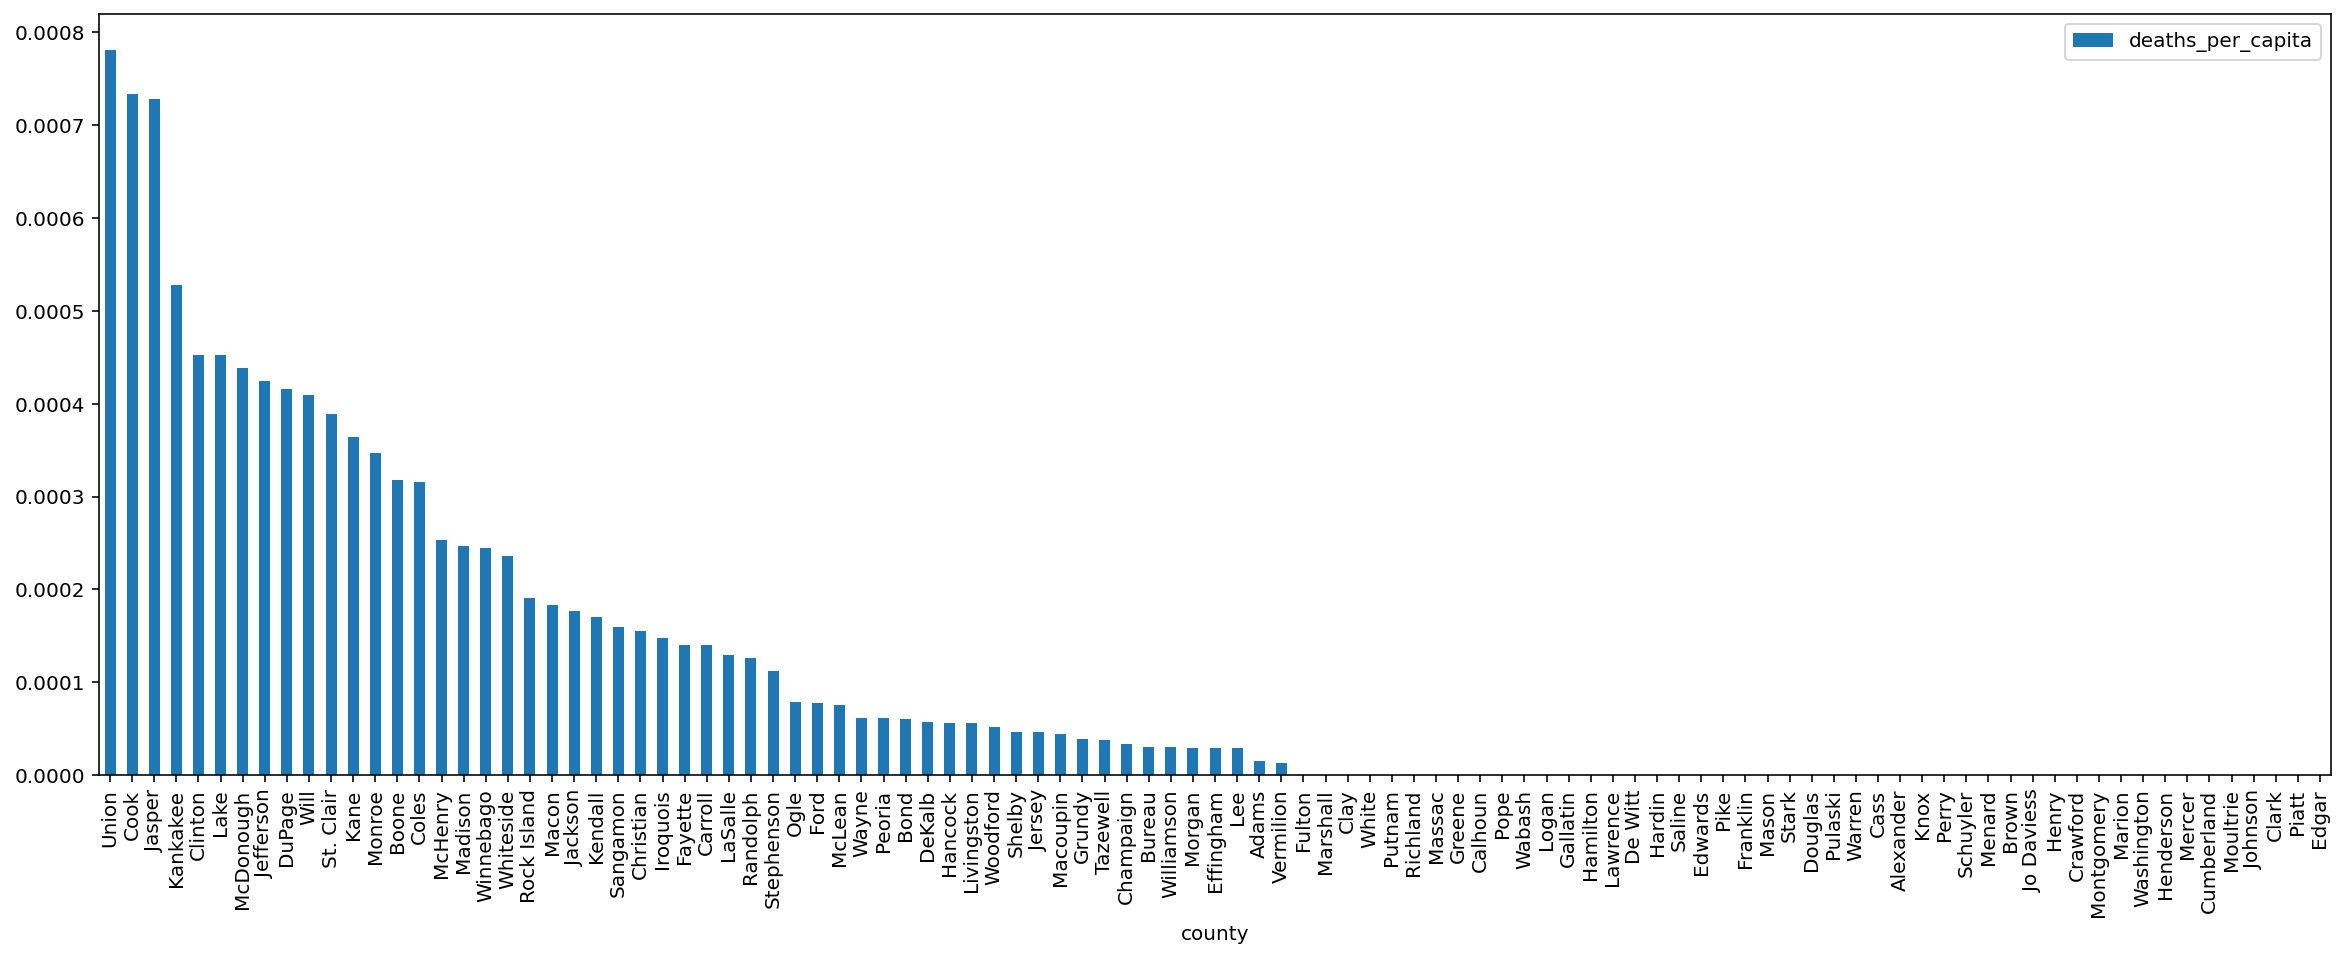

In [0]:
# Your codes go here...


# Answer
merge_df['cases_per_capita'] = merge_df['cases']/merge_df['POPESTIMATE2019']
merge_df['deaths_per_capita'] = merge_df['deaths']/merge_df['POPESTIMATE2019']

merge_df = merge_df.sort_values(by='cases_per_capita', ascending=False)
ax = merge_df.plot(x='county', y='cases_per_capita', kind='bar', figsize=(20,7))

merge_df = merge_df.sort_values(by='deaths_per_capita', ascending=False)
ax1 = merge_df.plot(x='county', y='deaths_per_capita', kind='bar', figsize=(20,7))
plt.show()